# **Introduction to LangGraph**

## **What's Covered?**
1. What is LangGraph?
2. Why is LangGraph powerful?
3. Key Components of LangGraph
    - State
    - Node
    - Edge
    - Graph
    - StateGraph
5. Visualizing the Graph
6. Graph with Multiple Inputs
7. Summary

## **What is LangGraph?**
**LangGraph** is an open-source framework built on top of **LangChain**, designed to help you build **stateful, multi-step LLM applications as graphs**.

It’s inspired by traditional computation graphs (like in Airflow or Ray) but optimized for LLM-first applications — think of workflows where the flow of execution is dynamic and dependent on LLM outputs, state, or external API responses.

In short:
LangGraph = LangChain + State Machine + Flow Control for LLM apps.

Where LangChain focuses on creating modular chains (linear flows), LangGraph enables you to **Model applications as state machines or directed graphs**, where:
- Nodes represent LLM calls, tools, or logic.
- Edges represent transitions between nodes based on outcomes, conditions, or data.

LangGraph is ideal for:
1. Conversational agents with memory
2. Complex workflows involving decision trees
3. Multi-agent systems (e.g., agents that collaborate, debate, or vote)
4. Retry logic, conditional steps, and loops

LangGraph gives you fine-grained control over how your application progresses through each step, much like designing a flowchart—but for LLMs and tools.

## **Why is LangGraph powerful?**

| Feature                     | Benefit                                                              |
| --------------------------- | -------------------------------------------------------------------- |
| **Graph-based execution**   | Go beyond linear chains—support branching, looping, and conditionals |
| **Stateful memory**         | Maintain memory or knowledge state between steps                     |
| **Multi-agent workflows**   | Simulate collaboration or reasoning between AI agents                |
| **Deterministic paths**     | Define exactly how your app flows based on output                    |
| **LangChain compatibility** | Fully compatible with LangChain tools and components                 |
| **Production-ready**        | Designed with retries, fallbacks, observability in mind              |

## **Key Components of LangGraph**
1. State
2. Node
3. Edge
4. Graph
5. StateGraph

### **1. State**
State in LangGraph is a central shared dictionary (or object) that holds context as it moves through the graph.

Each node can read from, modify, or add to the state.

In [1]:
from typing import TypedDict

# Define a typed state
class MyState(TypedDict):
    user_message: str
    response: str

### **2. Node**
A node is a function (or LangChain component) that:
- Accepts a state as input
- Does something with it (e.g., call LLM, DB, tool)
- Returns an updated state

You can think of it as one step in your workflow.

In [2]:
def respond_node(state: MyState) -> MyState:
    user_query = state['user_message']
    state['response'] = f"I received your question: {user_query}"
    return state

### **3. Edge**
An edge connects one node to another. LangGraph supports:
- Static edges: direct transitions
- Conditional edges: choose next node based on logic or state

### **4. Graph**
The Graph is the full computation DAG (Directed Acyclic Graph). It contains:
- Nodes
- Edges
- State definition

LangGraph uses StateGraph for this.

In [3]:
from langgraph.graph import StateGraph

graph = StateGraph(MyState)

graph.add_node("node", respond_node)
graph.set_entry_point("node")
graph.set_finish_point("node")

/Users/kanavbansal/Developer/.env_jupyter/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### **5. StateGraph & Compiling**
Once nodes and edges are added, you compile the graph and run it.

In [4]:
app = graph.compile()

app.invoke({"user_message": "What is the time?"})

{'user_message': 'What is the time?',
 'response': 'I received your question: What is the time?'}

## **Visualizing the Graph**

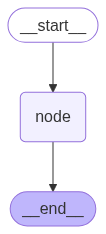

In [5]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

## **Graph with Multiple Inputs**

In [6]:
# Step 1: Defining a State
from typing import TypedDict, List

# Define a typed state
class AgentState(TypedDict):
    name: str
    values: List[int]
    response: str

In [8]:
# Step 2: Define a node

def processor_node(state: AgentState) -> AgentState:
    """This function takes a list and return the sum of all the values."""
    state['response'] = f"Hi {state['name']}, Sum of input list is {sum(state['values'])}."
    return state

In [9]:
# Step 3: Define a Graph

from langgraph.graph import StateGraph

graph = StateGraph(AgentState)

graph.add_node("node", processor_node)
graph.set_entry_point("node")
graph.set_finish_point("node")

In [10]:
# Step 4: Compile the graph

app = graph.compile()

app.invoke({"name": "ThatAIGuy", "values": [5, -1, 0, 2, 9]})

{'name': 'ThatAIGuy',
 'values': [5, -1, 0, 2, 9],
 'response': 'Hi ThatAIGuy, Sum of input list is 15.'}

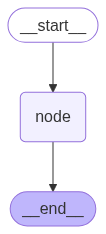

In [11]:
# Visualize the Graph

from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

## **Summary**

| Component       | Description                                                                                                                |
| --------------- | -------------------------------------------------------------------------------------------------------------------------- |
| `Node`       | A function or LangChain component (e.g., Chain, Tool, Agent) that performs a task. Each node receives and returns a state. |
| `Edge`       | A transition between nodes. Can be unconditional or conditional (based on output or state).                                |
| `Graph`      | A combination of nodes + edges. Represents the full workflow.                                                              |
| `State`      | A central dictionary that holds all context shared across nodes. Think of it like a memory store or a context object.      |
| `StateGraph` | A special LangGraph class that helps you define, validate, and execute your graph logic with type-safe states.             |